# CO416 - Machine Learning for Imaging

## Coursework 1 - Classification

In this coursework you will be applying the material taught in the course up to and including lecture 4.

$\mathbf{NOTE - \text{READ THIS}:}$ 
- During this coursework you will be asked to comment on the performance of various aspects of the models you develop. The discussion should be done along the following lines:
    - Maximum 100 words of discussion - You are asked to be brief and on point, platitudes and excessive writing will be penalized
    - You should mention effects on accuracy, and computational requirements i.e. time and computational complexities. Empirical arguments are accepted 
    
- When you are asked to change the hyperparamenters, validate the performance of your classifier and explicitly state the optimal hyperparameters you found and their accuracy

## Question 1 (50 Points) 

In this question we will use a toy spiral dataset as generated by the [`make_moons`](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_moons.html) function of sklearn

1) Create a dataset of 1000 points with a noise value of 0.1 and random_state=0 and augment it using polynomial features (recommended degree 10-15) (4 points)

In [42]:
import matplotlib.pyplot as plt

from sklearn.datasets import make_moons
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import BaggingClassifier

import numpy as np

In [99]:
X, Y = make_moons(1000, noise=0.5, random_state=0)

pol_transform = PolynomialFeatures(degree=15)
X_extended = pol_transform.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_extended, Y, test_size=0.20, random_state=42)

2) Visualize your input data - the first 2 dimensions would suffice  (3 points)



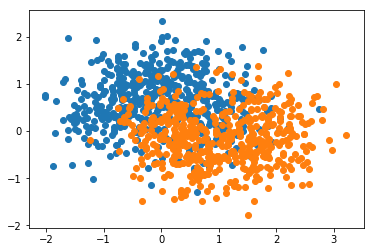

In [100]:
X_0 = X[np.isin(Y, 0)]
X_1 = X[np.isin(Y, 1)]

plt.scatter(X_0[:,0], X_0[:,1])
plt.scatter(X_1[:,0], X_1[:,1])

plt.show()

3) Use a Decision Tree to classify the data (5 points)



In [101]:
# Decision Tree, using Gini

decision_tree_gini = DecisionTreeClassifier(random_state=0)
decision_tree_gini.fit(x_train, y_train)
gini_acc = decision_tree_gini.score(x_test, y_test)

4) Try both Gini Impurity and Information Gain, which performs better? What is the difference between them? (4 points)

In [102]:
decision_tree_entropy = DecisionTreeClassifier(criterion='entropy', random_state=0)
decision_tree_entropy.fit(x_train, y_train)
entropy_acc = decision_tree_entropy.score(x_test, y_test)

print("Gini accuracy: {} versus Information Gain accuracy {}".format(gini_acc, entropy_acc))

Gini accuracy: 0.815 versus Information Gain accuracy 0.825


Information gain provides better results on this dataset, as this index usually favors smaller partitions with many distinct values, while Gini provides better results on larger datasets. Also, for our case we only have 2 categories, within one moon or the other, so the Information Gain approach is unbiased.

The Gini index must be minimized, while we aim to maximize the information gain, as we want to obtain as much new information as possible at every step.

5) Perform classification using a tree depth of 1-20. Plot the accuracy versus tree depth. (5 points)



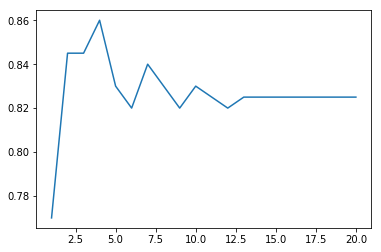

In [112]:
depth_sizes = range(1, 21)

accuracies = []
for depth in depth_sizes:
    dt = DecisionTreeClassifier(criterion='entropy', max_depth=depth, random_state=0)
    dt.fit(x_train, y_train)
    accuracies.append(dt.score(x_test, y_test))
    
plt.plot(depth_sizes, accuracies)
plt.show()

6) How does the depth of a tree affect performance and computational burden? (1 points)



In [ ]:
## ADD YOUR CODE HERE

7) Use Bootstrap Classifier to classify your data, base estimator should be a decision tree. Tune hyperparameters of tree depth, n_of estimators, max_samples and bootstrap. Plot accuracy versus different hyperparameters. (7 points)



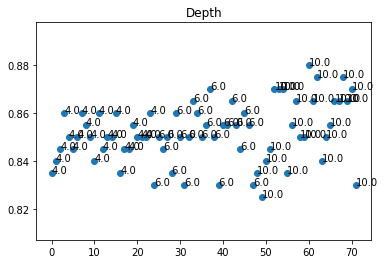

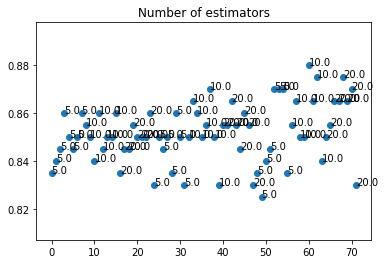

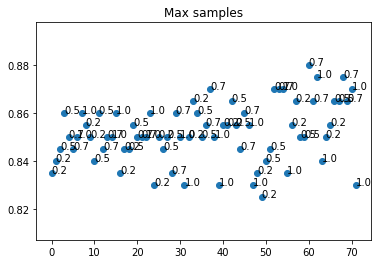

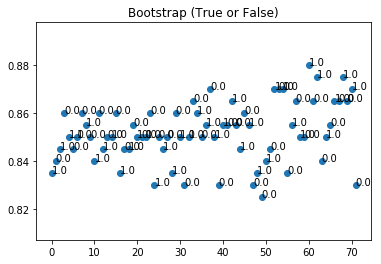

In [106]:
depths = [4, 6, 10]
bootstrap = [True, False]
n_estimators = [5, 10, 20]
max_samples = [0.2, 0.5, 0.7, 1.0]

configs = []

for depth in depths:
    dt = DecisionTreeClassifier(criterion="entropy", max_depth=depth, random_state=0)
    for n_est in n_estimators:
        for max_s in max_samples:
            for bs in bootstrap:    
                bs_clr = BaggingClassifier(base_estimator=dt, n_estimators=n_est, max_samples=max_s, bootstrap=bs, random_state=0)
                bs_clr.fit(x_train, y_train)
                bs_acc = bs_clr.score(x_test, y_test)
                configs.append(np.array([depth, n_est, max_s, bs, bs_acc]))

configs = np.array(configs)                

for idx, txt in enumerate(["Depth", "Number of estimators", "Max samples", "Bootstrap (True or False)"]):
    plt.scatter(list(range(len(configs))), configs[:,4])
    for i in range(len(configs)):
        plt.annotate(configs[i][idx], (i, configs[i][4]))
    plt.title(txt)
    plt.show()


8) Why do we use Bootstraping when we create our datasets? Did you use replacement ? Why ? (1 points) 

Bootstraping is used to uncorrelate different instances of the same classifier sampling from the same dataset. In our case, we have tuned the "bootstrap" parameter of the Bagging Classifier to offer results with both replacement and without. The reason for using replacement is to provide asymmetry (different datasets) to each instance - these instances will learn different features better and, during the voting stage, will increase the chances of a correct prediction.

9)  Use a Decision Forest to classify the dataset (4 points)



In [109]:
rf = RandomForestClassifier(criterion='entropy', n_estimators=35, max_depth=10, bootstrap=True, random_state=0)
rf.fit(x_train, y_train)
rf_acc = rf.score(x_test, y_test)
print(rf_acc)

0.86


10) Modulate the number of trees to 1-99 with a step of 10. Plot accuracy versus number of trees. (4 points)



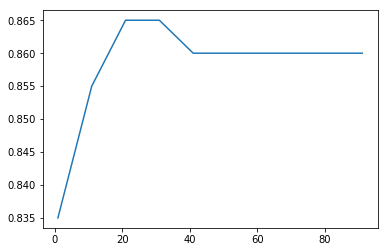

In [110]:
no_of_estimators = range(1, 100, 10)

accuracies = []
for n_estimator in no_of_estimators:
    rf = RandomForestClassifier(criterion='entropy', n_estimators=n_estimator, max_depth=10, random_state=0)
    rf.fit(x_train, y_train)
    rf_acc = rf.score(x_test, y_test)
    accuracies.append(rf_acc)

plt.plot(no_of_estimators, accuracies)
plt.show()

11) Modulate the depth of  the trees from 1 to 20 - use best number of trees from above. Plot the accuracy versus depth. (4 points)



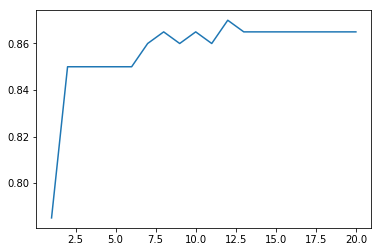

In [111]:
depths = range(1, 21)

accuracies = []
for depth in depths:
    rf = RandomForestClassifier(criterion='entropy', n_estimators=20, max_depth=depth, bootstrap=True, random_state=0)
    rf.fit(x_train, y_train)
    rf_acc = rf.score(x_test, y_test)
    accuracies.append(rf_acc)
    
plt.plot(depths, accuracies)
plt.show()

12) Comment on the performance change while you modulate depth of trees and number of trees (3 points)

In [ ]:
## ADD YOUR CODE HERE

13) Visualise how the classification split is done in relation to the data both for Decision Tree and Decision Forest (3 points)

In [33]:
## ADD YOUR CODE HERE
# TODO: take plot_decision_boundary from tutorial 2

## Question 2 (50 Points)
In this question we will be using the fashion-MNIST dataset for image classification. 

If you are interested, you may find relevant information regarding the dataset in this paper:
Fashion-MNIST: A novel image dataset for benchmarking machine learning algorithms. Han Xiao, Kashif Rasul, Roland Vollgraf. [arXiv:1708.07747](https://arxiv.org/abs/1708.07747)

The data is provided under `/vol/lab/course/416/data/fashion`. The dataset is already split into a set of 60,000 training images and a set of 10,000 test images. The images are of size 28x28 pixels and stored as 784-dimensional vector. So if you would like to visualise the images, you need to reshape the array.

There are in total 10 classes, which are labelled as follows:
0. T-shirt/top
1. Trousers
2. Pullover
3. Dress
4. Coat
5. Sandal
6. Shirt
7. Sneaker
8. Bag
9. Ankle boot

**Your tasks are** (all tasks carry equal marks):
- Use a Decision Forest to classify t-shirts and ankle boots - tune your forest!
- Train and compare an Adaboost classifier with a decision tree 
- Modulate the number of trees in the Adaboost and the depth of the trees. Comment on the performance and complexity 
- Train a Decsiion Forest for all classes and also compare the performance with another ensemble algorithm of your choice
- What is the theoretical difference between Random Forests and Adaboost classifiers? (100 words max)

In [113]:
# load the data
import numpy as np
import pandas as pd

data_dir = '/home/adicatana/Desktop/datasets/'

df_train = pd.read_csv(data_dir + 'fashion_mnist_train.csv')
df_test = pd.read_csv(data_dir + 'fashion_mnist_test.csv')

x_train = df_train.drop('label', axis=1).values.astype(np.uint8)
y_train = df_train['label'].values.astype(np.uint8)
x_test = df_test.drop('label', axis=1).values.astype(np.uint8)
y_test = df_test['label'].values.astype(np.uint8)

In [22]:
labels_to_select = [0, 9]

selected_indexes = np.isin(y_train, labels_to_select)
selected_x_train = x_train[selected_indexes]
selected_y_train = y_train[selected_indexes]

selected_indexes = np.isin(y_test, labels_to_select)
selected_x_test = x_test[selected_indexes]
selected_y_test = y_test[selected_indexes]

# convert labels to binary: digit_1=False, digit_2=True
# selected_y_train = selected_y_train==selected_y_train[1]
# selected_y_test = selected_y_test==selected_y_test[1]

In [20]:
rf = RandomForestClassifier(criterion='entropy', n_estimators=10, max_depth=10, bootstrap=True, random_state=0)

rf.fit(selected_x_train, selected_y_train)
rf_acc = rf.score(selected_x_test, selected_y_test)

print(rf_acc)

0.9995


In [29]:
from sklearn.ensemble import AdaBoostClassifier

dt = DecisionTreeClassifier(criterion="entropy", max_depth=4, random_state=0)

adaboost_clr = AdaBoostClassifier(base_estimator=dt, n_estimators=80, learning_rate=0.5, random_state=0)
adaboost_clr.fit(selected_x_train, selected_y_train)
adaboost_acc = adaboost_clr.score(selected_x_test, selected_y_test)
print(adaboost_acc)

0.999


In [30]:
rf = RandomForestClassifier(criterion='entropy', n_estimators=10, max_depth=10, bootstrap=True, random_state=0)

rf.fit(x_train, y_train)
rf_acc = rf.score(x_test, y_test)

print(rf_acc)

0.8373


In [32]:
dt = DecisionTreeClassifier(criterion="entropy", max_depth=10, random_state=0)

adaboost_clr = AdaBoostClassifier(base_estimator=dt, n_estimators=10, learning_rate=1.0, random_state=0)
adaboost_clr.fit(x_train, y_train)
adaboost_acc = adaboost_clr.score(x_test, y_test)
print(adaboost_acc)

0.7628
